In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
articles=pd.read_csv("C:/Users/dell/Downloads/articles/articles.csv")

In [162]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [163]:
remove_cols=['product_code','product_type_no','graphical_appearance_no','colour_group_code','index_code',
             'index_group_no','section_no','garment_group_no','perceived_colour_value_id',
             'perceived_colour_master_id','department_no']
articles=articles.drop(remove_cols,axis=1)

In [164]:
articles['article_id'] = articles['article_id'].astype(str)
articles['article_id']=["0"+x for x in articles['article_id']]

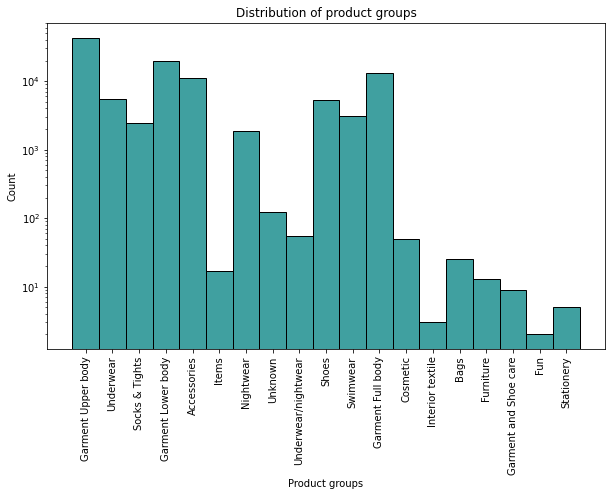

In [165]:
plt.figure(figsize=(10,6))
sns.histplot(x=articles['product_group_name'],color='teal')
plt.title('Distribution of product groups')
plt.xlabel('Product groups')
plt.xticks(rotation=90, fontsize=10)
plt.yscale('log')
plt.show()

In [166]:
product_groups_list=['Garment Upper body','Garment Lower body','Garment Full body','Socks and Tights','Nightwear','Shoes','Swimwear','Unknown']
selected_articles = articles.loc[articles['product_group_name'].isin(product_groups_list)].reset_index()

In [167]:
selected_articles.loc[selected_articles['product_group_name']=='Unknown'][['product_type_name','section_name','department_name']].value_counts()

product_type_name  section_name                    department_name        
Unknown            Womens Lingerie                 Clean Lingerie             21
                                                   Expressive Lingerie        11
                   Ladies Denim                    Denim Trousers              9
                   Womens Lingerie                 Casual Lingerie             7
                   Men Suits & Tailoring           Knitwear                    6
                   Womens Small accessories        Other items                 5
                   Denim Men                       Denim shorts                5
                   Divided Collection              Trousers                    4
                   Mens Outerwear                  Jacket Casual               4
                   Baby Girl                       Baby Girl Woven             3
                   Men Underwear                   Socks Bin                   3
                   Ladies H&M Spor

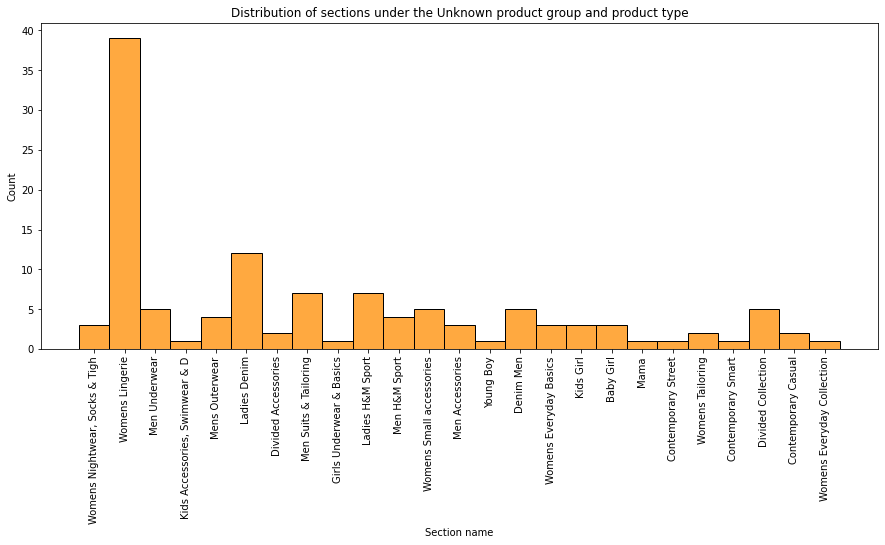

In [168]:
plt.figure(figsize=(15,6))
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['section_name'],color='darkorange')
plt.title('Distribution of sections under the Unknown product group and product type')
plt.xlabel('Section name')
plt.xticks(rotation=90, fontsize=10)
#plt.yscale('log')
plt.show()

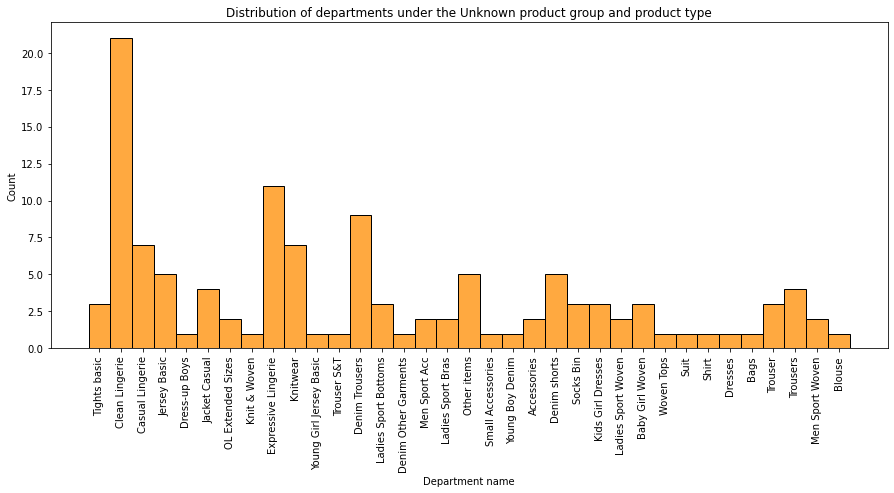

In [169]:
plt.figure(figsize=(15,6))
sns.histplot(x=articles.loc[articles['product_group_name']=='Unknown']['department_name'],color='darkorange')
plt.title('Distribution of departments under the Unknown product group and product type')
plt.xlabel('Department name')
plt.xticks(rotation=90, fontsize=10)
#plt.yscale('log')
plt.show()

In [170]:
departments_to_remove_list=['Clean Lingerie','Expressive Lingerie','Casual Lingerie','Other items','Accessories',
                           'Ladies Sport Bras','Small Accessories','Bags']
selected_unknownproductgroup_articles = selected_articles.loc[(selected_articles['product_group_name']=='Unknown') & 
                                          (~selected_articles['department_name'].isin(departments_to_remove_list))]

In [171]:
selected_unknownproductgroup_articles

,index,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
38,64,0156224002,Box 4p Socks,Unknown,Unknown,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
2869,4246,0480093001,Box 3p Tights 40 den,Unknown,Unknown,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with an elasticated waist. 40 denier.
5240,7405,0513699009,R-NECK SS BASIC 3 PK,Unknown,Unknown,Solid,White,Light,White,Jersey Basic,Menswear,Menswear,Men Underwear,Jersey Basic,Round-necked T-shirts in organic cotton jersey.
5241,7406,0513699010,R-NECK SS BASIC 3 PK,Unknown,Unknown,Solid,Black,Dark,Black,Jersey Basic,Menswear,Menswear,Men Underwear,Jersey Basic,Round-necked T-shirts in organic cotton jersey.
5659,7971,0519243001,X-mas Hat Own,Unknown,Unknown,Solid,Red,Medium,Red,Dress-up Boys,"Children Accessories, Swimwear",Baby/Children,"Kids Accessories, Swimwear & D",Accessories,Santa hat with a faux fur pompom on top and wi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85371,104298,0921169001,Brady Pull On Cord,Unknown,Unknown,Solid,Black,Dark,Black,Trouser,Menswear,Menswear,Contemporary Casual,Trousers,Trousers in soft cotton corduroy with conceale...
85372,104299,0921169002,Brady Pull On Cord,Unknown,Unknown,Solid,Dark Beige,Medium Dusty,Brown,Trouser,Menswear,Menswear,Contemporary Casual,Trousers,Trousers in soft cotton corduroy with conceale...
85559,104527,0923758001,Vanessa,Unknown,Unknown,Solid,White,Light,White,Blouse,Ladieswear,Ladieswear,Womens Everyday Collection,Blouses,"Wide shirt in a cotton weave with a collar, bu..."
85779,104796,0927131002,Payton Hood(1),Unknown,Unknown,Melange,Dark Grey,Dark,Grey,Men Sport Woven,Sport,Sport,Men H&M Sport,Jersey Fancy,Track jacket in sturdy cotton-blend jersey wit...


In [172]:
indices_to_replace=selected_unknownproductgroup_articles.index
selected_articles.loc[indices_to_replace]=selected_unknownproductgroup_articles

In [173]:
selected_articles

,index,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0,0108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,0108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,0108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,8,0111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Tights with built-in support to lift the botto...
4,11,0112679048,SWEATSHIRT OC,Sweater,Garment Upper body,All over pattern,Grey,Dusty Light,Grey,Baby basics,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Jersey Basic,Sweatshirt in soft organic cotton with a pres...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86270,105535,0952937003,Jets dress,Dress,Garment Full body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Fitted, calf-length dress in viscose jersey wi..."
86271,105536,0952938001,Elton top,Top,Garment Upper body,All over pattern,Beige,Medium Dusty,Mole,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,Fitted top in jersey with a round neckline and...
86272,105538,0953763001,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
86273,105539,0956217002,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [174]:
selected_articles.describe()

,index
count,86275.000000
mean,53239.253480
std,30193.259742
min,0.000000
25%,27070.500000
50%,53219.000000
75%,79453.500000
max,105541.000000


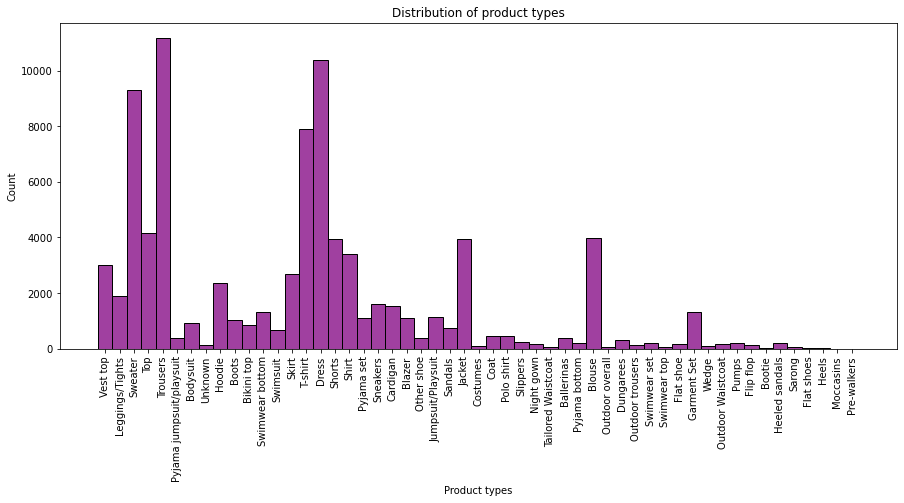

In [175]:
plt.figure(figsize=(15,6))
sns.histplot(x=selected_articles['product_type_name'],color='purple')
plt.title('Distribution of product types')
plt.xlabel('Product types')
plt.xticks(rotation=90, fontsize=10)
#plt.yscale('log')
plt.show()

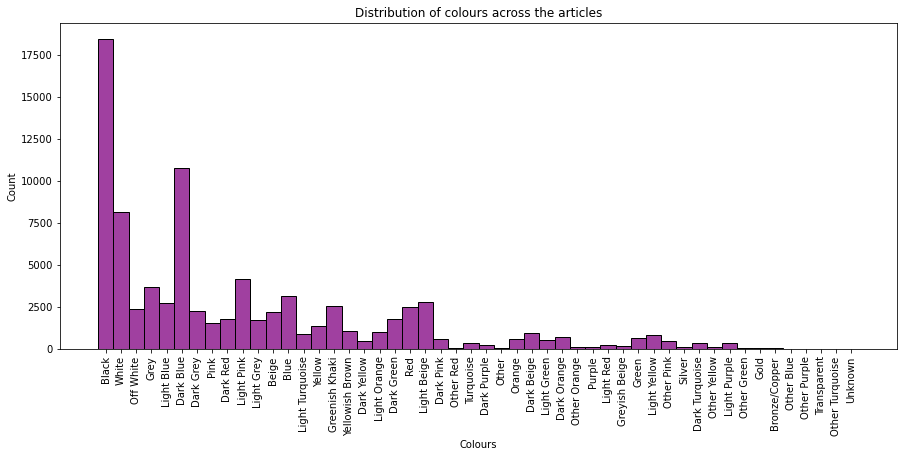

In [176]:
plt.figure(figsize=(15,6))
sns.histplot(x=selected_articles['colour_group_name'],color='purple')
plt.title('Distribution of colours across the articles')
plt.xlabel('Colours')
plt.xticks(rotation=90, fontsize=10)
#plt.yscale('log')
plt.show()

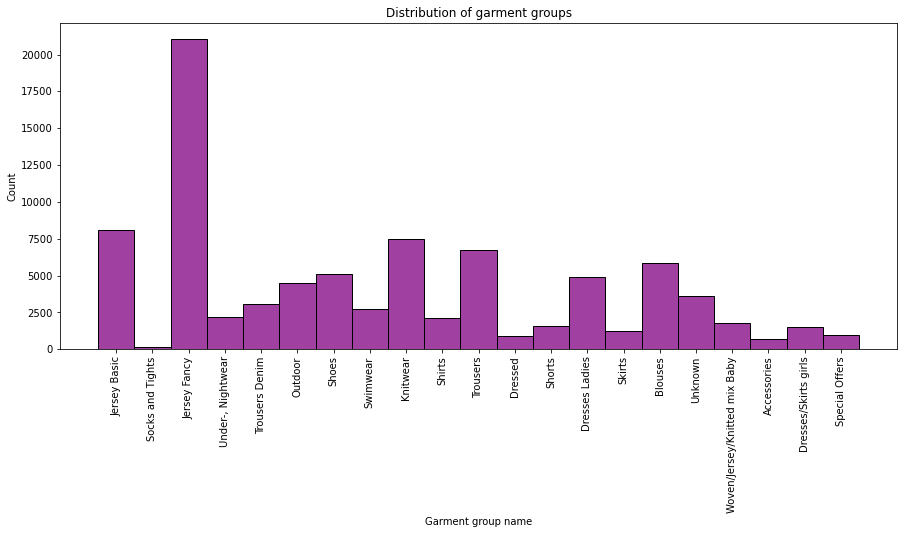

In [177]:
plt.figure(figsize=(15,6))
sns.histplot(x=selected_articles['garment_group_name'],color='purple')
plt.title('Distribution of garment groups')
plt.xlabel('Garment group name')
plt.xticks(rotation=90, fontsize=10)
#plt.yscale('log')
plt.show()

In [178]:
indices=[x[:3] for x in selected_articles['article_id']]

indices=sorted(list(set(indices)))

len(indices)

85